In [1]:
import sys
import os
# path_to_dmcalc = '../lzdev/code/dmcalc/install/python/'
path_to_dmcalc = os.getenv('HOME') +'/dmcalc/install/python/'
sys.path.append(path_to_dmcalc)
import pydmcalc as dm
import numpy as np
import matplotlib.pyplot as plt

# Dark Matter

## Halo Models

0.999499765519342
0.9999995261413172


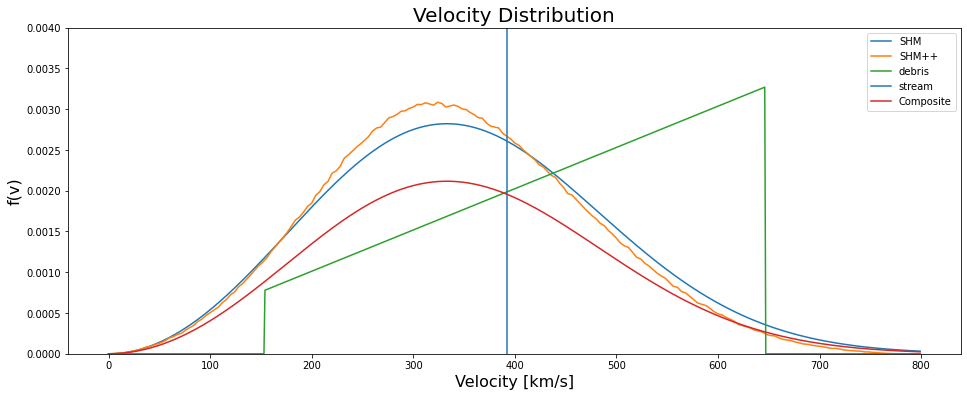

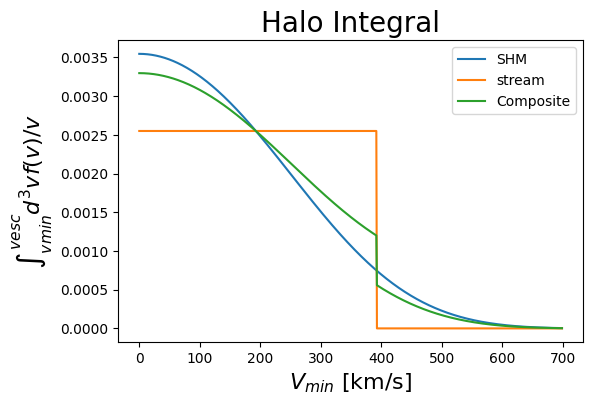

In [3]:
plt.figure(figsize = (16,6))
velocities = np.r_[:800]
shm = dm.HaloSHM(vc_km_s = 235)
debris = dm.DebrisFlow(.3, 400)
stream = dm.Stream(.3, [400,100,100],220)
v = 233 / (2**.5)
shmpp = dm.HaloSHMpp()
halo = dm.CompositeHalo()
halo += .75*dm.CompositeHalo(shm)
f_v = shm.velocity_pdf(velocities)
print(np.sum(f_v))
plt.plot(velocities, f_v, label ='SHM')
f_v = shmpp.velocity_pdf(velocities)
np.convolve(f_v, np.ones(5)/5, 'same')
plt.plot(velocities, f_v, label ='SHM++')
print(np.sum(f_v))
f_v = debris.velocity_pdf(velocities)
plt.plot(velocities, f_v, label ='debris')
f_v = stream.velocity_pdf(velocities)
plt.axvline(stream.speed_km_s, label ='stream')
halo += .25 *dm.CompositeHalo(stream)
halo.normalize()
f_v = halo.velocity_pdf(velocities)
plt.plot(velocities, f_v, label ='Composite')
plt.title("Velocity Distribution", fontsize = 20)
plt.xlabel('Velocity [km/s]', fontsize = 16)
plt.ylabel('f(v)', fontsize = 16)
plt.legend()
plt.ylim(0, .004)

plt.figure(figsize = (6,4), dpi = 100)
velocities = np.r_[:700]
# shmpp = dm.HaloSHMpp()
g_v = shm.integral_s_km(velocities)
plt.plot(velocities, g_v, label = 'SHM')
# g_v = shmpp.integral_s_km(velocities)
# plt.plot(velocities, g_v, label = 'SHM++')
# g_v = debris.integral_s_km(velocities)
# plt.plot(velocities, g_v, label = 'debris')
g_v = stream.integral_s_km(velocities)
plt.plot(velocities, g_v, label = 'stream')
g_v = halo.integral_s_km(velocities)
plt.plot(velocities, g_v, label = 'Composite')
plt.xlabel('$V_{min}$ [km/s]', fontsize = 16)
plt.title("Halo Integral", fontsize = 20)
plt.ylabel('$\int_{vmin}^{vesc} d^3v f(v)/v$', fontsize = 16)
plt.legend()
# plt.ylim(0, .035)

In [9]:
shm.velocity_pdf(np.r_[:27:.01]).sum()*.01

0.0003709851901835901

In [3]:
shmpp.integral_s_km(0)

0.003490930887713463

In [31]:
f_v = stream.pdf(velocities)
np.sum(f_v)

0.0

## Recoil Rates

In [2]:
target = dm.Target.Create("Xe")
shm = dm.HaloSHM()
wimprate = dm.RateWimp(target,
                        halo = shm,
                        coupling = dm.Coupling.SI,
                        mass = 40, xsection = 1e-45)
energies = np.logspace(0, 3, 200, base =10)
rates = wimprate.get_rate(energies)

In [3]:
integral = dm.RateIntegrator(lambda x: wimprate.get_rate(x), 0.1, 150)

In [4]:
rate = wimprate.get_rate(np.r_[:150:129*1j])
cdf = np.zeros(129)
cdf[1:] = .5*(rate[1:] + rate [:-1])
cdf = cdf.cumsum()

In [5]:
wimprate.get_rate(.01)

45.89463364333403

In [6]:
integral.start

0.1

Text(0.5, 0, 'Recoil [keV]')

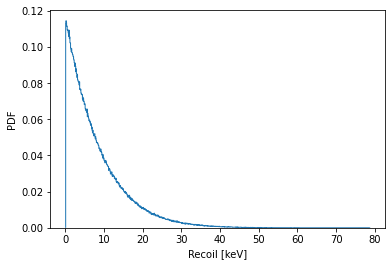

In [7]:
x = np.random.rand(1000000)
Er = np.array([integral.sample(p) for p in x])
plt.hist(Er, histtype = 'step', density = True, bins = 1000)
# plt.step(np.r_[:150:129*1j], np.diff(cdf/cdf.max(), prepend = 0))
# plt.xlim(0, 50)
plt.ylabel("PDF")
plt.xlabel("Recoil [keV]")

Text(0.5, 0, 'CDF')

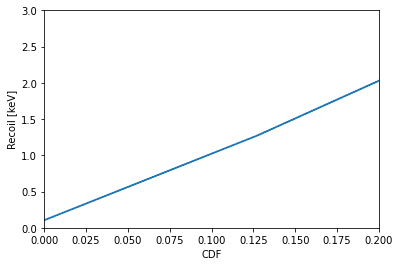

In [11]:
x = np.r_[:1:1e-3]
Er = np.array([integral.sample(p) for p in x])
plt.step(x, Er)
# plt.step(cdf/cdf.max(),np.r_[:150:129*1j])
plt.ylim(0, 3)
plt.xlim(0, .2)
plt.ylabel("Recoil [keV]")
plt.xlabel("CDF")

In [41]:
integral.sample(1.01)

25.0

Text(0.5, 1.0, 'WIMP Recoil Rates (Xe, $\\sigma = 1 zb$)')

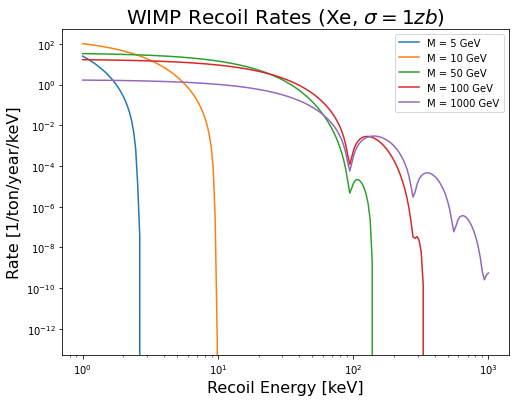

In [8]:
plt.figure(figsize = (8,6))
for mass in [5,10,50, 100, 1000]:
    wimprate.mass_GeV = mass
    rates = wimprate.get_rate(energies)
    plt.loglog(energies, rates, label = 'M = %.f GeV'%mass)
plt.xlabel("Recoil Energy [keV]", fontsize = 16)
plt.ylabel('Rate [1/ton/year/keV]', fontsize = 16)
plt.legend()
plt.title('WIMP Recoil Rates (Xe, $\sigma = 1 zb$)', fontsize = 20)

In [17]:
!pip install scipy

     |████████████████████████████████| 28.4 MB 671 kB/s eta 0:00:01


In [51]:
(12 / 55 * 6e23)**(1/3) * 6000e5

3.0465467908972836e+16

In [18]:
import numpy as np
import scipy
from scipy.special import spherical_jn

In [39]:
def helm(q, A):
    c = 1.23* A**(1/3) - .6
    a = .52
    s = 0.9
    R = (c**2 + (7/3)*np.pi**2 * a**2  - 5*s*s)**.5
    return 3*spherical_jn(1,q*R)/ (q*R)

In [38]:
A = 131
c = 1.23* A**(1/3) - .6
a = .52
s = 0.9
R = (c**2 + (7/3)*np.pi**2 * a**2  - 5*s*s)**.5
R

5.836451084056975

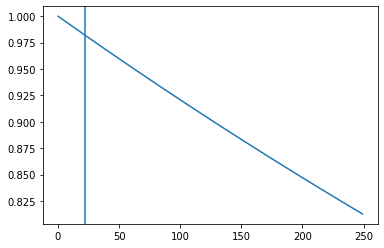

In [50]:
recoils = np.r_[0.1:250.0]
A = 12
q = np.sqrt(2 * 938 * A*recoils*1e-3) / 197.3
plt.plot(recoils, helm(q, A)**2)
v = 1e-3
plt.axvline(2* 938e3* A *v**2 )

In [9]:
plt.figure(figsize = (8,6))
wimprate.mass_GeV = 50
energies = np.logspace(0,  np.log10(200),200, base =10)

for tname in ['He', 'Ge',  'Ar', 'Xe']:
#     target = dm.target_factory.get_entry(tname)
    wimprate.target = dm.Target.Create(tname)
    rates = wimprate.get_rate(energies)
    plt.loglog(energies, rates, label = tname)
plt.xlabel("Recoil Energy [keV]", fontsize = 16)
plt.ylabel('Rate [1/ton/year/keV]', fontsize = 16)
plt.ylim(1e-6, 1e2)
plt.legend()
plt.title('Targets (50 GeV WIMP, $\sigma$ = 1 zb)', fontsize =20)

Text(0.5, 1.0, 'Targets (50 GeV WIMP, $\\sigma$ = 1 zb)')

In [3]:
target = dm.Target.Create("Xe")
shm = dm.HaloSHM()
wimprate = dm.RateWimp(target,
halo = shm,
coupling = dm.Coupling.SI,
mass = 1e18, xsection = 1e-33)
energies = np.logspace(0, 3, 200, base =10)
rates = wimprate.get_rate(energies)

xsection = wimprate.get_cross_section()

In [20]:
sigma = 1e-33
nuc = dm.Nucleus.Create("Xe131")
m_X = 1e18
r = 4 * nuc.mass_GeV * m_X / (nuc.mass_GeV + m_X)**2
mu_T  = nuc.mass_GeV * m_X / (nuc.mass_GeV + m_X)
mu_p = m_X *.938/ (m_X+.938)
halo = sigma * (mu_T / mu_p)**2 * 131**2 * 2 / (1e6*1e18*r)
sigma * (mu_T / mu_p)**2 * 131**2 
# sigma *  131**4 * 2 / (1e6*1e18*r)

2.8987684616715746e-25

In [37]:
wimprate.dm_nucleon_cs_cm2 = 1e-33
xsection.scale=1e-33
r = 4 * nuc.mass_GeV * m_X / (nuc.mass_GeV + m_X)**2
xsection.dSigmadErHalo_cm2_keV(0,nuc) *.5e6 * 1e18 *r, 1e-33*131**4

(2.8970877464808144e-25, 2.94499921e-25)

In [32]:
target = wimprate.target

In [33]:
target.average_A

131.29276235756387

In [36]:
for nucleus, a, b in target:
    print(nucleus.mass_GeV)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [7]:
xsection.dSigmadErHalo_cm2_keV(0,nuc) * r* 1e18

NameError: name 'r' is not defined

In [40]:
wimprate.collisional_xsection(0, 1e18) * r * 1e18, wimprate.total_xsection(1e18, 0, r*1e18)

(2.925252646797404e-25, 1.11934136348307e-26)

In [121]:
xsection.dSigmadErHalo_cm2_keV(0,nuc) *.5e6, xsection.dSigmadEr_cm2_keV(0, 1e18, nuc)

(5.9410519694534555e-40, 5.9410519694534555e-40)

In [98]:
(mu_T / mu_p)**2, (nuc.mass_GeV/.938)**2

(16891.60574367213, 16891.60574367213)

In [62]:
xsection = wimprate.get_cross_section()

In [45]:

recoils = np.r_[0:r*1e18]
sigmas = np.array([xsection.dSigmadEr_cm2_keV(r,1e18,nuc) for r in recoils])
plt.semilogy(recoils, sigmas)
np.sum(sigmas)

1.1446742212743097e-26

In [17]:
np.log10(272599263733136.53)

14.435524678508678

In [23]:
(n_avo *rho / 131)**(-2/3)

1.799383731533447e-15

In [24]:
1/(wimprate.total_xsection(.5e17*(474/3e5)**2*1e6, 1, 100)*n_avo*rho/131)

91.37585812286575

In [28]:
beta =  np.r_[1e-6:2e-3:200*1j]
wimprate.dm_nucleon_cs_cm2 = 1e-31
mass = 1e17
wimprate.mass_GeV = mass
rho = 2.85
A=131
n_avo = 6.022e23

sigmas = np.array([wimprate.total_xsection(.5*b**2 *mass *1e6, 0, 2*b**2 *124 *1e6 ) for b in beta])
lengths = A/(n_avo * sigmas * rho)
plt.semilogy(beta*3e5, lengths*10, label =r'$\sigma_{N\chi} = %.g cm^2$'%(wimprate.dm_nucleon_cs_cm2) )
wimprate.dm_nucleon_cs_cm2 = 1e-32
sigmas = np.array([wimprate.total_xsection(.5*b**2 *mass *1e6, 0, 2*b**2 *124 *1e6 ) for b in beta])
lengths = A/(n_avo * sigmas * rho)
plt.semilogy(beta*3e5, lengths*10, label =r'$\sigma_{N\chi} = %.g cm^2$'%(wimprate.dm_nucleon_cs_cm2) )
plt.grid(which = 'both')
plt.legend()
plt.xlabel(r'$v [kps]$', fontsize = 16)
plt.ylabel('Interaction length [mm]', fontsize = 16)
LZ_R = 728
LZ_A = np.pi* LZ_R**2 *2 + 2*np.pi*LZ_R**2*2
LZ_V = np.pi*LZ_R**3*2
LZ_L = 4*LZ_V/LZ_A
plt.axhline(LZ_L, label = 'LZ length scale', ls = '--', color = 'black')
LUX_R = 235
LUX_H=480
LUX_A = np.pi* LUX_R**2 *2 + 2*np.pi*LUX_R*LUX_H
LUX_V = np.pi*LUX_R**2*LUX_H
LUX_L = 4*LUX_V/LUX_A
plt.axhline(LUX_L, label = 'LUX length scale', ls = '--', color = 'black')
plt.title('M=%g'%wimprate.mass_GeV, fontsize = 20)
plt.legend()

## Annual Modulation

NameError: name 'rates2' is not defined

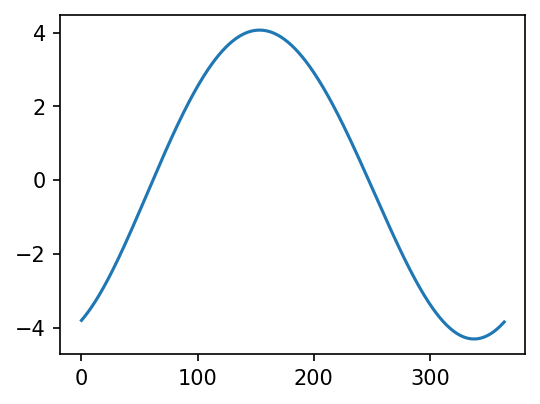

In [26]:
plt.figure(figsize = (4,3), dpi = 150)
energies = np.r_[3.2:200:.1]
days = np.r_[:365:1]
wimprate.halo_model = dm.HaloSHM(.3,220, 544, beta = 1)
mean_rate = wimprate.get_rate(energies)
wimprate.mass_GeV = 20
wimprate.dm_nucleon_cs_cm2=1e-46
rates = []
for day in days:
    wimprate.halo_model.day_j2000 = day
    rates.append(np.sum(wimprate.get_rate(energies)*np.diff(energies, prepend = 0)))
rates = np.array(rates)
plt.plot(days, 100*(rates/np.mean(rates) -1), label = 'SHM')
wimprate.halo_model = dm.HaloSHMpp()
days = np.r_[:365:14]
wimprate.mass_GeV = 50
rates = []
for day in days:
    wimprate.halo_model.day_j2000 = day
    rates.append(np.sum(wimprate.get_rate(energies))*.1)
rates = np.array(rates)
plt.plot(days, rates2/np.mean(rates2) -1, label = 'SHM++')
plt.xlabel('Days since Jan. 1')
plt.ylabel('Rate modulation (%)')
# plt.axhline(np.mean(rates)/365, ls = '--', label = 'Mean')
plt.legend()
plt.title('WIMP-Xe Modulation ')

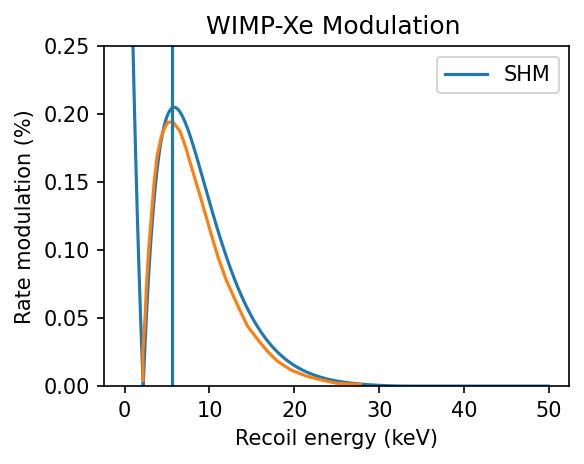

In [294]:
plt.figure(figsize = (4,3), dpi = 150)
days = np.r_[:365:1]
energies = np.r_[.1:50:.1]
wimprate.halo_model = shm

wimprate.target = xe131
wimprate.mass_GeV = 20
wimprate.dm_nucleon_cs_cm2=1e-46
wimprate.halo_model.day_j2000 = 154
rates_peak = wimprate.get_rate(energies)
wimprate.halo_model.day_j2000 = 154+180
rates_off = wimprate.get_rate(energies)

plt.plot(energies, np.abs(rates_peak - rates_off), label = 'SHM')
# wimprate.halo_model = dm.HaloSHMpp()
# days = np.r_[:365:14]
# wimprate.mass_GeV = 50
# rates = []
# for day in days:
#     wimprate.halo_model.day_j2000 = day
#     rates.append(np.sum(wimprate.get_rate(energies))*.1)
# rates = np.array(rates)
# plt.plot(days, rates2/np.mean(rates2) -1, label = 'SHM++')
plt.xlabel('Recoil energy (keV)')
plt.plot(mccabe[:,0], mccabe[:,1])
plt.ylabel('Rate modulation (%)')
# plt.axhline(np.mean(rates)/365, ls = '--', label = 'Mean')
plt.legend()
plt.title('WIMP-Xe Modulation ')
plt.ylim(0, .25)
plt.axvline(5.6)

Text(0, 0.5, 'R [events / ton/year/kev]')

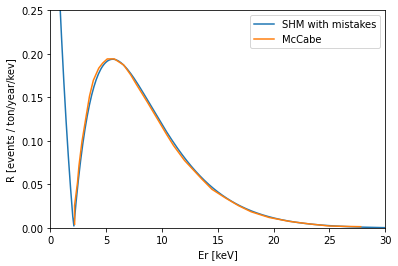

In [57]:
mccabe = np.array([
[2.16889,0.00414757],
[2.15869,0.0255292],
[2.42605,0.0522609],
[2.55689,0.071589],
[2.82385,0.0991431],
[3.16144,0.125465],
[3.49922,0.151375],
[3.84072,0.169473],
[4.32424,0.183462],
[4.67164,0.189224],
[5.08945,0.194165],
[5.71969,0.194175],
[6.56336,0.187199],
[7.1991,0.175696],
[7.69439,0.165013],
[8.68458,0.14447],
[9.60435,0.124748],
[10.3827,0.107902],
[11.0192,0.0947548],
[12.0078,0.0775011],
[13.5587,0.0561448],
[14.4747,0.0442353],
[15.6699,0.0343864],
[16.8647,0.0253599],
[17.9884,0.0183882],
[19.6022,0.0118357],
[21.4251,0.00734261],
[23.1771,0.0044931],
[24.999,0.00205593],
[26.2597,0.00166548],
[27.8005,0.00127963]])

xe131 = dm.Target("Xe131")
nuc = dm.Nucleus("Xe131", 131, 131, 54, 3. / 2., -0.009, -0.272)
xe131.add_nucleus(1, nuc)
energies = np.r_[.1:50:.1]
xemass = 131
shm = dm.HaloSHM(rho_GeV_cm3 = .3, vc_km_s=233, ve_km_s=220,beta = 0)
wimprate = dm.RateWimp(dm.Target.Create("Xe"),
halo = shm,
coupling = dm.Coupling.SI,
mass = 20, xsection = 1e-46)
wimprate.mass_GeV = 20
wimprate.dm_nucleon_cs_cm2=1e-46
cross = wimprate.get_cross_section()
xs = np.array([cross.dSigmadErHalo_cm2_keV(energy, nuc) for energy in energies])
vmin = np.array([wimprate.get_vmin_kps(energy, xemass) for energy in energies])

n = .3/20
gev2ton = 1.78266173e-30
c = 299792.458
y2s = 365. * 24. * 3600.
conv = 1e5 * c*c*y2s / gev2ton

shm.day_j2000 = 154

zeta = np.array([shm.integral_s_km(v) for v in vmin])



rate = zeta * n * xs/xemass
shm.day_j2000 = 154+180
zeta = np.array([shm.integral_s_km(v) for v in vmin])

rate2 = zeta * n * xs/xemass
# plt.semilogy(energies, conv*rate2)
plt.plot(energies, np.abs(conv*(rate - rate2)), label = 'SHM with mistakes')
# plt.plot(energies, np.abs(rates_peak - rates_off))
plt.plot(mccabe[:,0], mccabe[:,1], label = 'McCabe')
plt.ylim(0, .25)
plt.xlim(0, 30)
plt.xlabel('Er [keV]')
plt.legend()
plt.ylabel('R [events / ton/year/kev]')

In [220]:
np.max(rates_peak-rates_off)

0.203367876327055

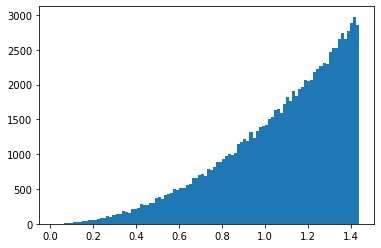

In [335]:
x = np.random.rand(100000)

y = (3*x)**(.33)

plt.hist(y, bins = 100);

In [60]:
wimprate.halo_model.day_j2000 = 154
zeta1 = 
wimprate.halo_model.day_j2000 = 154+180
zeta2=wimprate.halo_model.GetHaloIntegral_s_km(vmin)

In [67]:
2*(zeta1 - zeta2)/(zeta2+zeta1) * 2.44

0.2517923511495012

In [19]:
def vE(Day,v0):
    pi = np.pi
    sin = np.sin
    cos = np.cos
    uSX = 11.1
    uSY = v0 + 12.24
    uSZ = 7.25

    n = Day + 7303.5 #Day=0 is midnight 1 Jan 2020
    T = (n)/36525.
    e1 = 0.9574 * pi/180.
    L = (280.460 + 0.9856474 * n) * pi/180.
    g = (357.528 + 0.9856003 * n) * pi/180.
    varpi = (282.932 + 0.0000471 * n) * pi/180.
    lam0 = varpi - 270.*pi/180.
    l = L + 2.*e1*sin(g) +5./4.*e1*e1*sin(2.*g)
    UEave = 29.79 #units are km/s

    bX = (5.536+0.013*T) * pi/180.
    bY = (-59.574+0.002*T) * pi/180.
    bZ = (-29.811+0.001*T) * pi/180.

    lamX = (266.840+1.397*T) * pi/180.
    lamY = (347.340+1.375*T) * pi/180.
    lamZ = (180.023+1.404*T) * pi/180.
    
    uEX = UEave * cos(bX) * ( sin(l-lamX) - e1 * cos(lamX-lam0) )
    uEY = UEave * cos(bY) * ( sin(l-lamY) - e1 * cos(lamY-lam0) )
    uEZ = UEave * cos(bZ) * ( sin(l-lamZ) - e1 * cos(lamZ-lam0) )

    vEx = uSX+uEX
    vEy = uSY+uEY
    vEz = uSZ+uEZ
    
    #units are km/s
    return [vEx,vEy,vEz]

In [20]:
v2 = np.array([dm.EarthVelocity.velocity_kps(d, 233) for d in x])
v2 = np.sum(v2**2, axis = 1)**.5

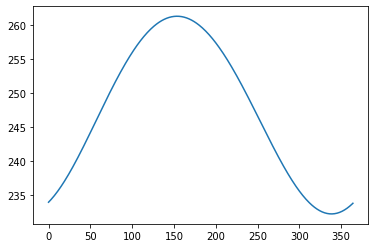

In [34]:
x = np.r_[:365]
v = np.array([vE(d, 220) for d in x])
v = np.sum(v**2, axis = 1)**.5
plt.plot(x, v2)
# plt.plot(x, v2)

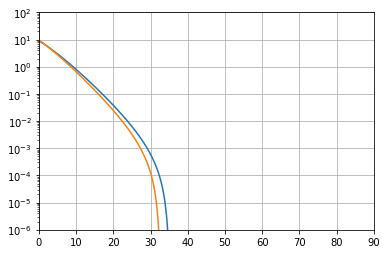

In [43]:
plt.semilogy(energies, rates_peak)
plt.semilogy(energies, rates_off)
plt.ylim(1e-6, 1e2)
plt.xlim(0, 90)
plt.grid()

## Overburden Effects

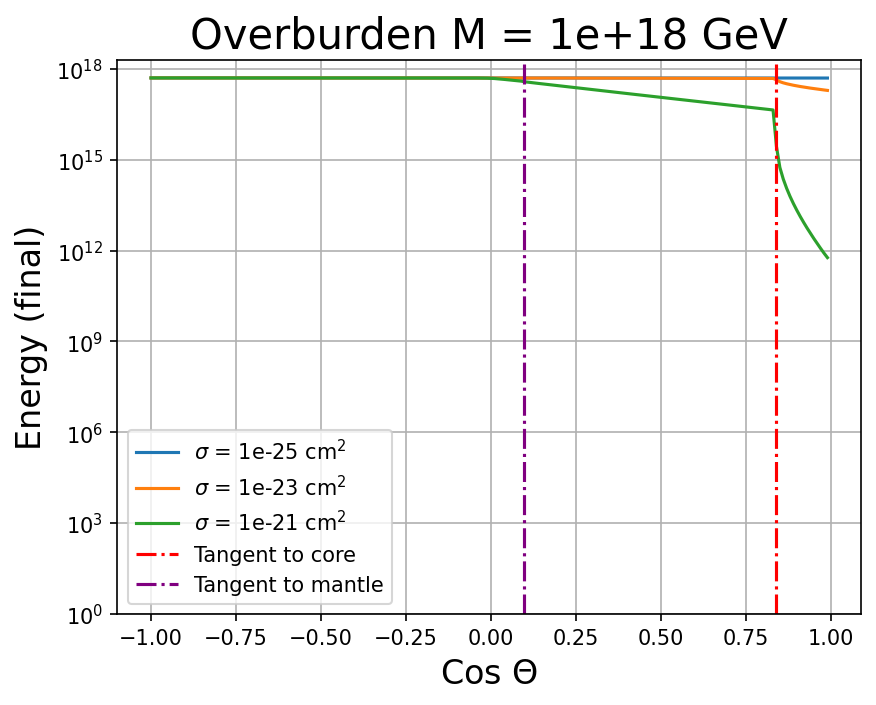

In [99]:
core = 3480
mantle = 2867
radius = core + mantle + 32
plt.figure(dpi=150)
shield = dm.EarthShield()
mass = 1e18
plt.gca().grid(which = 'both')
xsection = dm.SICrossSection(mass, 1e-30)
depth = 4850/5280 *1.609
angles = np.r_[-1:1:.01]

for sigma in [1e-25, 1e-23, 1e-21]:
    xsection.scale = sigma
    attens = np.array([shield.get_log_atten(depth, angle, mass, xsection, .5*mass) for angle in angles])
    plt.semilogy(angles, .5*mass* np.exp(attens), label = '$\sigma$ = %g cm$^2$'%sigma)
cosine_core =  ( 1- (core/(radius - depth))**2)**.5
cosine_mantle =  (1-((core + mantle)/(radius - depth))**2)**.5
plt.axvline(cosine_core, color = 'r', ls = '-.', label = 'Tangent to core')
plt.axvline(cosine_mantle, color = 'g', ls = '-.', label = 'Tangent to mantle', c = 'purple')
plt.ylim(1,2*mass)
plt.xlabel("Cos $\Theta$", fontsize = 16)
plt.ylabel("Energy (final)", fontsize = 16)
plt.title('Overburden M = %.g GeV'%mass, fontsize = 20)
plt.legend()

import itertools

shield = dm.EarthShield()

# depth = 4850/5280 *1.609
depth = 2
angle = -1
masses = np.logspace(12, 19, 500, base = 10)
sigmas = np.logspace(-33, -18,500,  base = 10)
parameters = itertools.product(masses, sigmas)

attens = np.array(list(map(lambda x :
                             shield.get_log_atten(depth, angle, x[0], dm.SICrossSection(x[0], x[1]), .5*x[0]), parameters)))

parameters = itertools.product(masses, sigmas)
attens_below = np.array(list(map(lambda x :
                             shield.get_log_atten(depth, 1, x[0], dm.SICrossSection(x[0], x[1]), .5*x[0]), parameters)))

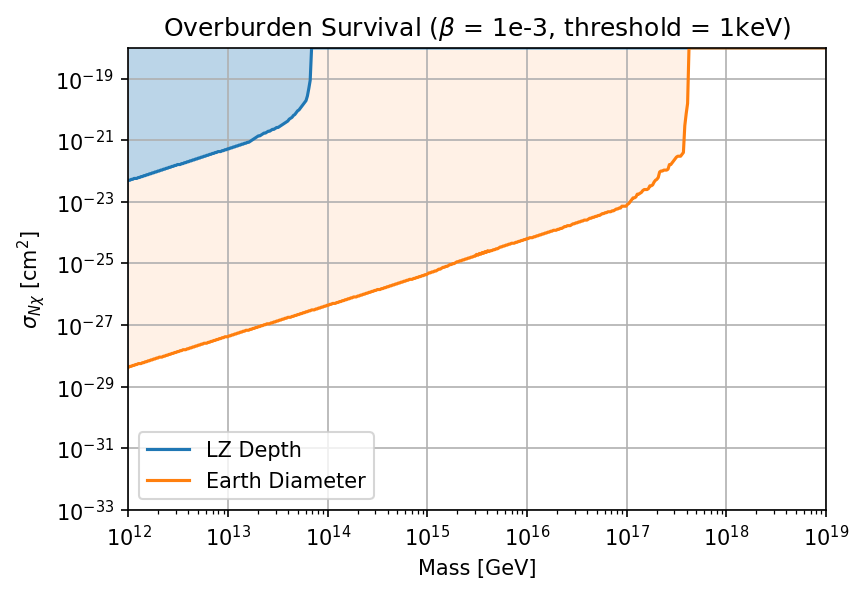

In [17]:
plt.figure(figsize = (6, 4),dpi=150)
attens =attens.reshape((500,500))
attens_below =attens_below.reshape((500,500))
plt.grid()
Ef = .5*np.exp(attens)*masses[ :,np.newaxis]
idx = (Ef>1).argmin(axis = 1)
idx[idx ==0 ] = -1
plt.loglog(masses, sigmas[idx], label = 'LZ Depth')
plt.ylim(sigmas[0], sigmas[-1])
plt.xlim(1e12, 1e19)
Ef = .5*np.exp(attens_below)*masses[ :,np.newaxis]
idx2 = (Ef>1).argmin(axis = 1)
idx2[idx2 ==0 ] = -1
plt.loglog(masses, sigmas[idx2], label = 'Earth Diameter')
plt.fill_between(masses, sigmas[idx],np.ones(len(masses))*1e-16, alpha = .3)

plt.fill_between(masses, sigmas[idx2],sigmas[idx], alpha = .1)
plt.ylim(sigmas[0], sigmas[-1])
plt.xlabel('Mass [GeV]')
plt.ylabel('$\sigma_{N\chi}$ [cm$^2$]')
plt.title(r'Overburden Survival ($\beta$ = 1e-3, threshold = 1keV)')
plt.legend()

In [10]:
np.save('overburden_curves', np.array([masses, sigmas[idx], sigmas[idx2]]))

# Neutrinos

In [2]:
# nu_db = dm.FluxDataBase()
target = dm.Target("Xe131")
nuc = dm.Nucleus.Create("Xe131")
target.add_nucleus(1,nuc)

In [5]:
nu_db = dm.FluxDataBase()

In [14]:
b8 = nu_db.get_flux('8B')
pp = nu_db.get_flux('pp')
f17 = nu_db.get_flux('17F')
rate = dm.NeutrinoRate('7Be_PP_CNO',dm.InteractionType.EWRRPA,target)
rate.get_rate(4)

2.3188428869781115

In [7]:
composite = dm.CompositeNeutrinoFlux()
f17_duplicate = nu_db.get_flux('17F')
f17_duplicate.total_flux = f17.total_flux*2
composite.add_component(b8)
composite.add_component(f17_duplicate)
energies =np.logspace(-2, 7, 500)
totals = []
plt.figure(figsize = (9,5), dpi = 100)
amp = pp.get_amplitudes(energies)
print('%g'%np.sum(amp*np.diff(energies, prepend = 0)))
plt.loglog(energies*1e-3, amp*1e3, label = 'pp')
amp = f17.get_amplitudes(energies)
plt.loglog(energies*1e-3, amp*1e3, label = 'F17')
amp = composite.get_amplitudes(energies)
plt.loglog(energies*1e-3, amp*1e3, label = 'B8 + 2* F17')
plt.xlim(1e-1, 1000)
plt.ylim(1e-3, 1e13)
plt.grid(which = 'both')
plt.xlabel('Neutrino Energy [MeV]', fontsize = 16)
plt.legend()
plt.ylabel('Flux [1/cm$^2$/s/MeV]', fontsize = 16)
plt.title('Neutrino Flux', fontsize = 20)


5.87352e+10


Text(0.5, 1.0, 'Neutrino Flux')

In [8]:
xsection = dm.NuCrossSectionER(dm.EWAtomicBinding.FreeElectron)
flavors = [.55, .282, .17]
pp.apply_oscillation()
total = 0
for flavor, value in pp.get_flavors().items():
    xsection.set_couplings(flavor)
    drdeR = pp.flavor_average(lambda E: xsection.dSigmadEr_cm2_keV(0, E, nuc), flavor) * pp.total_flux * 5.61e35 *(24*3600*365.25)/ (nuc.mass_GeV*1e6)
#     drdeR = pp.average(lambda E: xsection.dSigmadEr_cm2_keV(0, E, nuc)) * pp.total_flux* value[0] * 5.61e35 *(24*3600*365.25)/ (nuc.mass_GeV*1e6)
    total += drdeR
    print(drdeR)
print(total)
# pp.average(lambda E: xsection.dSigmadEr_cm2_keV(0, E, nuc))

0.173370592162312
0.2869055754800817
2.5977888447112996
3.058065012353693


In [21]:
nurate = dm.NeutrinoRate('PP',dm.InteractionType.EWFreeElectron)
nurate.get_rate(0)

4.897226102939554

(2.0, 5.0)

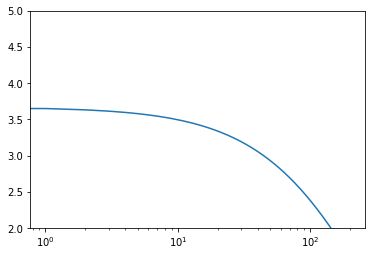

In [12]:
# nurate = dm.NeutrinoRate('PP',dm.InteractionType.EWFreeElectron)

xsection.set_couplings(dm.NeutrinoFlavour.e)
conv = 3600*24 * 365.25 * 6.022e23 / 131 * 1e6
energies = np.r_[:430]
amp = pp.get_amplitudes(energies)
recoils = np.r_[:200]
sigma = np.array([pp.flavor_average(lambda E: xsection.dSigmadEr_cm2_keV(Er, E, nuc), dm.NeutrinoFlavour.e)*pp.total_flux for Er in recoils])
plt.semilogx(recoils, sigma*conv)
plt.ylim(2, 5)

In [49]:
for key, value in pp.get_flavors().items():
    print(key)
    plt.plot(value)
    print(value[0])

NeutrinoFlavour.tau
0.16920399093544697
NeutrinoFlavour.mu
0.28191528827565754
NeutrinoFlavour.e
0.5488807207888955


In [48]:
value[0], value[1], value[2]

(0.5488807207888955, 0.5488807207888955, 0.5488807207888955)

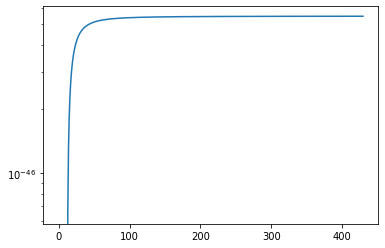

In [63]:
sigma = np.array([xsection.dSigmadEr_cm2_keV(1, E,nuc) for E in energies])
plt.semilogy(energies[:], sigma[:])

In [2]:
nurate = dm.NeutrinoRate('All',dm.InteractionType.EWFreeElectron)
spectrum = nurate.spectrum()

spectrum.flux_sum, spectrum.total_flux

(130392998053.80736, 130392998053.80736)

In [ ]:
plt.figure(figsize = (12,8))
total = 0
for name in['All',"DSN", "Atmospheric", "8B", "HEP", "PP", "PEP", "CNO", "7Be"]:
   
    nurate = dm.NeutrinoRate(name,dm.InteractionType.EWFreeElectron)
    er = np.logspace(-1, 5, 512)
    xsection = nurate.get_cross_section()
    
    plt.loglog(er, rate, label = name)
    total += nurate.spectrum().total_flux
plt.ylim(1e-11, 1e2)
plt.xlim(1e-1, 1e5)
plt.xlabel('Recoil Energy [keV]', fontsize = 16)
plt.legend()
plt.ylabel('Rate [Events /ton/year/keV]', fontsize = 16)
plt.title('Neutrino Recoil Rates (ER)', fontsize = 20)
plt.grid(which = 'both')

In [3]:
nurate2 = dm.NeutrinoRate('All',dm.InteractionType.EWFreeElectron)

spectrum = nurate2.spectrum()

spectrum.flux_sum, spectrum.total_flux

(130392998053.80736, 130392998053.80736)

In [30]:
6e10 *5.46e-46 * 6.022e23 / 131 * 1e6 * 24 * 3600 * 365.25

4.752447366009161

65271128029.676155
All 3.3182995484242768
85.65825275212126
DSN 5.767378951937256e-09
10.539733199999999
Atmospheric 3.9443486770147666e-10
5249929.356000002
8B 0.00021089124804675913
7979.990956256473
HEP 3.332829720761276e-07
59799581255.224045
PP 3.0457674501694245
144000000.0
PEP 0.007092891252091512
488288768.90715694
CNO 0.024350382629939344
4834000000.0
7Be 0.24087759367998782


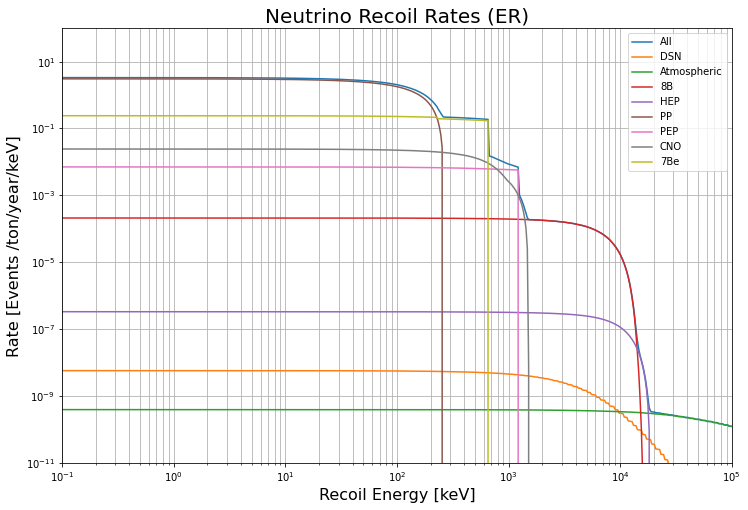

In [11]:
plt.figure(figsize = (12,8))
total = 0
for name in['All',"DSN", "Atmospheric", "8B", "HEP", "PP", "PEP", "CNO", "7Be"]:
   
    nurate = dm.NeutrinoRate(name,dm.InteractionType.EWFreeElectron)
    er = np.logspace(-1, 5, 512)
    rate = nurate.get_rate(er)
    print(nurate.spectrum().total_flux)
    print(name, rate[0])
    plt.loglog(er, rate, label = name)
    total += nurate.spectrum().total_flux
plt.ylim(1e-11, 1e2)
plt.xlim(1e-1, 1e5)
plt.xlabel('Recoil Energy [keV]', fontsize = 16)
plt.legend()
plt.ylabel('Rate [Events /ton/year/keV]', fontsize = 16)
plt.title('Neutrino Recoil Rates (ER)', fontsize = 20)
plt.grid(which = 'both')
# plt.ylim(.1, 10)

In [4]:
65271128029.676155/total

0.5

In [42]:
nu_db.get_flux_collection_name()

NameError: name 'nu_db' is not defined

In [16]:
plt.figure(figsize = (12,8))
energies =np.logspace(-2, 7, 500)
totals = []
for name in nu_db.get_flux_collection_name():
    flux = nu_db.get_flux(name)
    flux.check_mode()
    if(flux.mode == dm.FluxMode.Line):
        energy, amp = flux.get_line()
        plt.plot([ energy, energy], [0, amp], label = name, ls = '--')
        totals.append(flux.total_flux)
    else:
        amp = flux.get_amplitudes(energies)
        totals.append(flux.total_flux)
        plt.loglog(energies, amp, label = name)
#     plt.loglog(er, rate, label = name)
plt.xlim(10, 1e5)
plt.ylim(1e-4, 1e12)
plt.xlabel('Neutrino Energy [keV]', fontsize = 16)
plt.legend()
plt.ylabel('Flux [1/cm$^2$/s/keV]', fontsize = 16)
plt.title('Neutrino Flux', fontsize = 20)

Text(0.5, 1.0, 'Neutrino Flux')

In [9]:
totals = np.array(totals)
totals[:].sum()*2

130542256059.35231

In [4]:
xs = nurate.get_cross_section()

In [11]:
xs.dSigmadEr_cm2_keV(1,50000,nuc )

5.469111955269028e-46

In [21]:
target = dm.Target("X131")
nuc = dm.Nucleus.Create("Xe131")
target.add_nucleus(1, nuc)
print("created target")

nu_db = dm.FluxDataBase()
nurate = dm.NeutrinoRate("PP", dm.InteractionType.EWFreeElectron)
nurate.get_rate(1)

created target


1.631276261532691e-07

In [10]:
xs = dm.NuCrossSectionER(dm.EWAtomicBinding.FreeElectron)

In [22]:
xs2 = nurate.get_cross_section()

In [11]:
xs.set_couplings(dm.NeutrinoFlavour.e)

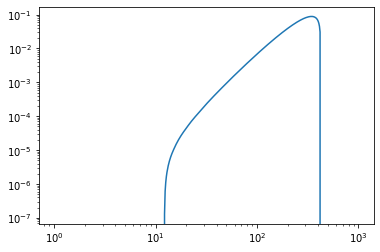

In [24]:
energy = np.logspace(0, 3, 500)
data = np.array([xs.dSigmadEr_cm2_keV(1,x,nuc ) for x in energy])
flux = nu_db.get_flux('pp')
flux.check_mode()
amp = flux.get_amplitudes(energy)
convfactor = 5.61e35 * 24*3600*365.25 / 121e6
plt.loglog(energy, data*amp*convfactor*np.diff(energy, prepend=0)*1e-3, label = "xs")

In [26]:
flux.total_flux

59899580554981.97

In [25]:
np.sum(data*amp*convfactor*np.diff(energy, prepend=0)*1e-3)

4.7351192239235855

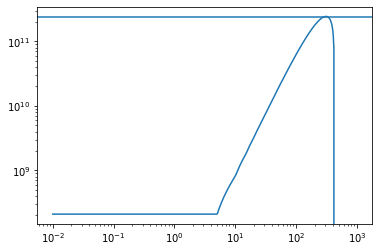

In [18]:

plt.loglog(energy,amp)
plt.axhline(5.99e10 * 4)
# plt.ylim(1e-42, 1e15)

In [17]:
4*6e10

240000000000.0

Text(0.5, 0, 'Energy keV')

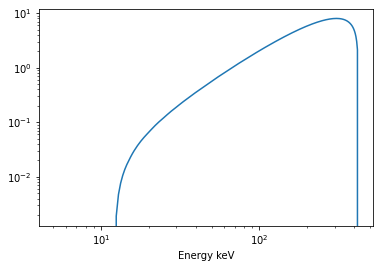

In [33]:
flux = nu_db.get_flux('pp')
amp = flux.get_amplitudes()
conversion = 5.61e35 * (24*365*3600)/(nuc.mass_GeV*1e6)
energy = np.array(flux.get_energies_MeV())
# energy = np.logspace(0, 3, 500, base =10)
data = np.array([xs.dSigmadEr_cm2_keV(1,x*1e3,nuc ) for x in energy])
values = (amp*data)*conversion*np.diff(energy, prepend = 0)
plt.loglog(energy*1e3, values*1e3)
plt.xlabel('Energy keV')

In [11]:
energy, mass = 10, 100
f'{energy:.3f} {mass}'

'10.000 100'

0.0
0.9897263185495977
5.8056665629544435
10.02303234262852
99.97024936277585


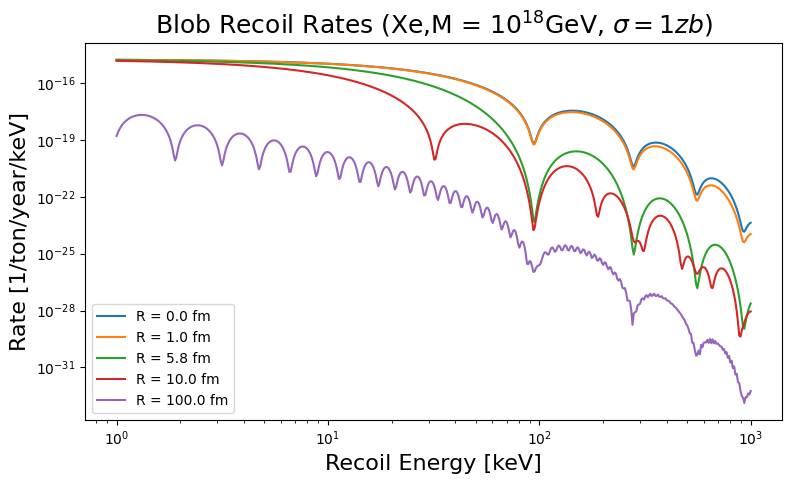

In [67]:
plt.figure(figsize = (9,5), dpi = 100)
energies = np.logspace(0, 3, 500)
for number in [1,.65e14, 2.45e14, 3.69e14 , 2.071e15]:
    wimprate = dm.RateBlob(
        mass = 1e18, xsection = 1e-45, number =int(number), target = dm.Target.Create("Xe"), halo=dm.HaloSHM())
    rates = wimprate.get_rate(energies)
    print(wimprate.radius)
    plt.loglog(energies, rates, label = 'R = %.1f fm'%wimprate.radius)
plt.xlabel("Recoil Energy [keV]", fontsize = 16)
plt.ylabel('Rate [1/ton/year/keV]', fontsize = 16)
plt.legend()
plt.title('Blob Recoil Rates (Xe,M = $10^{18}$GeV, $\sigma = 1 zb$)', fontsize = 18)
plt.savefig('Blob.pdf')

In [7]:
import scipy.stats as sp

import matplotlib as mpl
mpl.style.use('default')

import itertools

In [4]:

target = dm.Target.Create("Xe")
shm = dm.HaloSHM()
wimprate = dm.RateBlob(mass = 1e18, xsection = 1e-45, number =1, target=target, halo=shm)
energies = np.logspace(0, 3, 200, base =10)
rates = wimprate.get_rate(energies)

In [5]:
target.average_A

131.29276235756387

In [35]:
angles[-1]

1.0

In [53]:
def projected_area(costheta, radius=72.8, height = 72.8*2):
    return np.pi*radius**2* (costheta**2)**.5 + 2* radius *height*(1- costheta**2)**.5
radius = 72.8
height = 72.8*2
lz_volume = np.pi*radius**2 * height
lz_area = 2*np.pi*radius**2 + 2 * np.pi*radius*height

def projected_length(angle, radius, height):
    lz_volume = np.pi*radius**2 * height
    lz_area = 2*np.pi*radius**2 + 2 * np.pi*radius*height
    return lz_volume / projected_area(angle, radius, height)

angles = np.r_[-1:1:1000*1j]
velocities = np.r_[:750:100*1j]
masses = np.logspace(16, 20, 12, base = 10)
sigmas = np.logspace(-33, -29,20,  base = 10)

dv = (velocities[1]-velocities[0])

shield = dm.EarthShield()
xenon = dm.Target.Create("Xe")
parameters = itertools.product(masses, sigmas, velocities, angles )
mass = 1e18
sigma = 1e-30
rho_xe = 2.94 #g/cm^3
rho_dm = .3
depth = 2
lengths = projected_length(angles, radius, height)[np.newaxis,:]
areas = projected_area(angles, radius, height)[np.newaxis,:]

n_T = xe_number_density = (rho_xe/xenon.average_A )*6.022e23
livetime_s = 24*3600*1000
km2cm = 1e5
# flux_dm = rho_dm*v_dm #g*cm^-2*s^-1
vel = velocities[:, np.newaxis]
vpdf = shm.velocity_pdf(velocities)[:, np.newaxis]
n_chi = rho_dm / 1e19

In [21]:
dv = (velocities[1]-velocities[0])

In [28]:
vave = (velocities*vpdf.flatten()*dv).sum()
vave

331.87129529941154

In [37]:
areas.mean(), lz_area/4

(24966.03327992906, 24974.907613801992)

In [56]:
vave*areas.mean()* rho_dm * 1e5 * livetime_s / 2.3


9.337409308535097e+18

In [110]:
def events_in_livetime_basic(mass, sigma, velocities, angles):
    total_xsection  = sigma * 131**4
    n_chi = rho_dm / mass
    flux = km2cm*vel*vpdf* n_chi* areas *livetime_s
    counts = total_xsection*n_T * lengths
    dR_ss = flux * counts*np.exp(- counts)
    transits_ss = dR_ss.mean(axis = 1).sum()*dv
    dR_ms = flux * (1 - (counts+1)*np.exp(-counts ))
    transits_ms = dR_ms.mean(axis = 1).sum()*dv
    return transits_ss, transits_ms
def events_in_livetime(wimprate, velocities, angles):
    total_xsection = []
    for velocity, angle in itertools.product(velocities, angles):
        
        energy = .5* wimprate.mass_GeV * (velocity/ 3e5)**2*1e6
        atten = shield.get_log_atten(depth, angle, wimprate.mass_GeV, wimprate.get_cross_section(), energy)
    #     atten=1
        total_xsection.append( wimprate.total_xsection(energy*np.exp(atten), 1, 100))
    total_xsection = np.array(total_xsection).reshape(len(velocities), len(angles))
    n_chi = rho_dm / wimprate.mass_GeV
    flux = km2cm*vel*vpdf* n_chi* areas *livetime_s
    counts = total_xsection*n_T * lengths
    dR_ss = flux * counts*np.exp(- counts)
    transits_ss = dR_ss.mean(axis = 1).sum()*dv
    dR_ms = flux * (1 - (counts+1)*np.exp(-counts ))
    transits_ms = dR_ms.mean(axis = 1).sum()*dv
    return transits_ss, transits_ms

events = []
parameters = itertools.product(masses, sigmas)
n=0
for mass, sigma in parameters:
    if (n %10 ==0):
        print(mass, sigma)
    n+=1
    events.append(events_in_livetime_basic(mass, sigma, velocities, angles))

1e+16 1e-33
1e+16 1.274274985703132e-31
2.310129700083158e+16 1e-33
2.310129700083158e+16 1.274274985703132e-31
5.3366992312063016e+16 1e-33
5.3366992312063016e+16 1.274274985703132e-31
1.2328467394420634e+17 1e-33
1.2328467394420634e+17 1.274274985703132e-31
2.8480358684357933e+17 1e-33
2.8480358684357933e+17 1.274274985703132e-31
6.57933224657571e+17 1e-33
6.57933224657571e+17 1.274274985703132e-31
1.519911082952927e+18 1e-33
1.519911082952927e+18 1.274274985703132e-31
3.511191734215142e+18 1e-33
3.511191734215142e+18 1.274274985703132e-31
8.111308307896889e+18 1e-33
8.111308307896889e+18 1.274274985703132e-31
1.8738174228603867e+19 1e-33
1.8738174228603867e+19 1.274274985703132e-31
4.328761281083062e+19 1e-33
4.328761281083062e+19 1.274274985703132e-31
1e+20 1e-33
1e+20 1.274274985703132e-31


In [112]:
events = np.array(events).reshape(len(masses), len(sigmas),2)

In [109]:
events_full = events

In [108]:
np.save('MS_Reach.npy', events)

Text(0.5, 1.0, 'Projected Limits [LZ]')

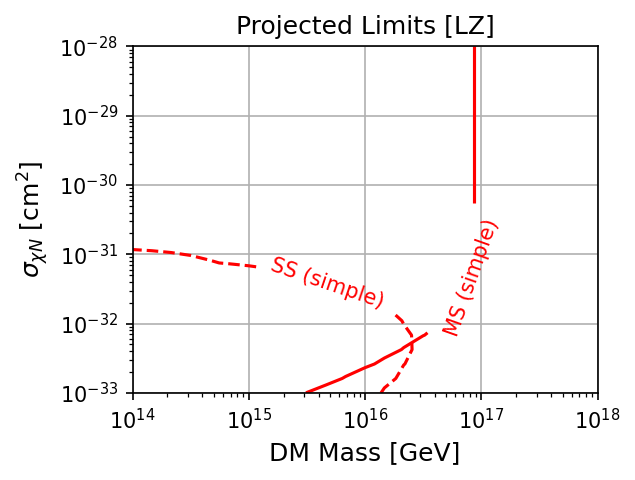

In [155]:
# %pylab inline
masses = np.logspace(14, 18, 25, base = 10)
sigmas = np.logspace(-33, -28,25,  base = 10)
fig, ax = plt.subplots(figsize = (4,3), dpi = 150)
ax.set_xscale('log')
ax.set_yscale('log')
# CS = plt.contour(masses,sigmas,events[:,:,0].T, colors= 'red', levels = [2.3])
CS = ax.contour(masses,sigmas,events[:,:,0].T, colors= 'red', levels = [2.3], linestyles = '--')
ax.clabel(CS, inline=True, fmt = {CS.levels[0]:'SS (simple)'},
          manual = [( 1e16, 1e-30)],fontsize=10)

CS = ax.contour(masses,sigmas,events[:,:,1].T, colors= 'red', levels = [2.3])
ax.clabel(CS, inline=True, fmt = {CS.levels[0]:'MS (simple)'},fontsize=10)


ax.set_xlabel('DM Mass [GeV]', fontsize = 12)
ax.set_ylabel('$\sigma_{\chi N}$ [cm$^2$]', fontsize = 12)

plt.grid()
# # plt.clabel(CS, inline=1, fmt = fmt,fontsize=10)
plt.title('Projected Limits [LZ]')
# fig.show()
# plt.legend()

In [152]:
vpdf.sum()*dv

0.9990523010023918

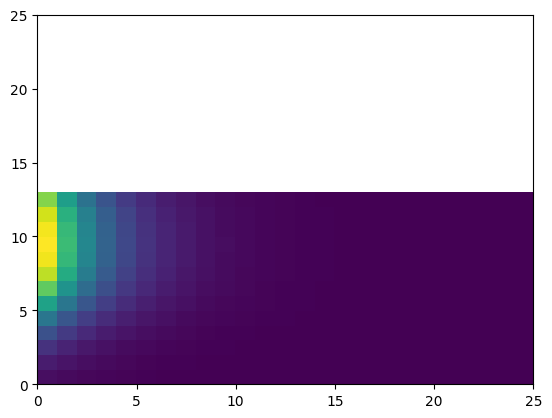

In [142]:
plt.pcolor(events[:,:,3].T)
ax.set_xscale('log')
ax.set_yscale('log')

In [79]:
dama = np.load('/home/reed/lzdev/code/tracks/notebooks/dama_floor.npy')

In [116]:
events = np.load('/home/reed/lzdev/code/tracks/notebooks/Event_counts.npy')

In [86]:
2*np.pi*20 * 48 + 2*np.pi*20**2

8545.132017764237

In [99]:
height

48.82

In [100]:
height =48
radius = 23.65
# height = 146.1
# radius = 72.8
lz_volume = np.pi*radius**2 * height
lz_area = 2*np.pi*radius**2 + 2 * np.pi*radius*height
lz_length = 4*lz_volume/ lz_area

(lz_area/4) *vave * .3 * livetime_s * 1e5 / 2.3 * 85.3/1000

8.491669826835974e+16

In [101]:
lz_area/4, 50**2

(2661.749718671305, 2500)

In [57]:
rho_dm = 0.3 #GeV/cm^3
# rho_dm = rho_dm * 1.783 * 10**-24 #g/cm^3
rho_xe = 2.94 #g/cm^3
v_dm = 0.001 #c
v_dm = v_dm * 3 * 10**10 #cm/s
flux_dm = rho_dm*v_dm #g*cm^-2*s^-1
xenon = dm.Target.Create("Xe")

xe_average_nucleons = 131
xe_number_density = (rho_xe/131 )*6.022e23

detector_dict = {'XENON_nT' : {'Length' : 96, 'Time' : 365*24*60*60},
                 'LZ' : {'Length': 97, 'Time' : 1000*24*60*60}
                }
upper_mass = []
sigma_ms = []
sigma = 10.**-np.arange(19,36,0.2)
mass = []
mass_ss = []
for key in detector_dict.keys():
    upper_mass.append((flux_dm * (detector_dict[key]['Length']**2) * detector_dict[key]['Time'])/(2.3))  
    sigma_ms.append(1/(detector_dict[key]['Length']*xe_number_density * xe_average_nucleons**4))
    mass.append(flux_dm * (detector_dict[key]['Length']**2) * detector_dict[key]['Time'] * (1-sp.poisson.cdf(1,detector_dict[key]['Length']*sigma*xe_number_density*xe_average_nucleons**4))/(2.3*rho_dm))
    mass_ss.append(flux_dm * (detector_dict[key]['Length']**2) * detector_dict[key]['Time'] * (sp.poisson.pmf(1,detector_dict[key]['Length']*sigma*xe_number_density*xe_average_nucleons**4))/(2.3*rho_dm))

(10000000000000.0, 1e+20)

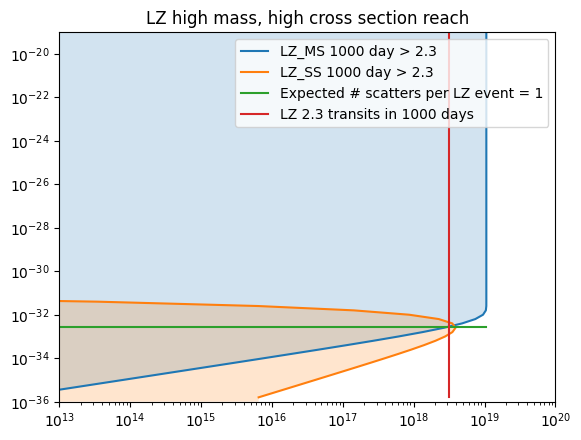

In [58]:
plt.plot(mass[1],sigma,label = 'LZ_MS 1000 day > 2.3')
plt.plot(mass_ss[1],sigma,label = 'LZ_SS 1000 day > 2.3')
plt.plot(mass[1],sigma_ms[1]*np.ones(len(mass[1])),label = 'Expected # scatters per LZ event = 1')
plt.plot([upper_mass[1],upper_mass[1]],[sigma[0],sigma[-1]],label = 'LZ 2.3 transits in 1000 days')
# plt.loglog(masses, sigmas[idx2], label = 'Earth Diameter overburden')
# plt.loglog(masses, sigmas[idx], label = 'LZ overburden')
# plt.fill_between(masses, sigmas[idx],1e-19)
#plt.plot(mass[0],sigma_ms[0]*np.ones(len(mass[0])),label = 'Expected # scatters per XENONnT event = 1')
#plt.plot([upper_mass[0],upper_mass[0]],[sigma[0],sigma[-1]],label = 'XENONnT 2.3 transits in 365 days')
plt.fill_between(mass[1],sigma,10**-19, alpha= 0.2)
plt.fill_between(mass_ss[1],sigma,10**-36,alpha=0.2)
plt.title('LZ high mass, high cross section reach')
plt.xlim(10**13,1e20)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper right')
plt.ylim(1e-36, 1e-19)
plt.xlim(1e13, 1e20)

In [28]:
xenon = dm.Target.Create("Xe")

In [39]:
dm.Nucleus.Create("Ar40").A == 40

True

In [30]:
for nuc,a , b in xenon:
    print(nuc.Z)

54
54
54
54
54
54
54
54
54


In [105]:
for n in range(2, 11):
    print(n)

2
3
4
5
6
7
8
9
10


In [111]:
a = np.r_[:10]
(a[:, np.newaxis]**a)[2,4]

16

In [112]:
np.math.factorial(a)

TypeError: only size-1 arrays can be converted to Python scalars

In [115]:
import scipy.special
scipy.special.factorial(a)

array([1.0000e+00, 1.0000e+00, 2.0000e+00, 6.0000e+00, 2.4000e+01,
       1.2000e+02, 7.2000e+02, 5.0400e+03, 4.0320e+04, 3.6288e+05])